In [8]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import os
import random
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Модуль 2
##  Задание 1. Загрузка данных 

In [10]:
# Все изображения извлечены из архива при помощи кода Python и сохранены в директорию images
with zipfile.ZipFile("Gauge.zip","r") as zip_ref:
    zip_ref.extractall()

old_folder_name = "Gauge_big"
new_folder_name = "images"

# Переименовываем папку
os.rename(old_folder_name, new_folder_name)

## Задание 2. Предварительная обработка

In [11]:
import os
from PIL import Image

def preprocess_images(input_dir, output_dir):
    # Проверяем, существует ли выходная директория, если нет - создаем
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Проходим по всем поддиректориям в исходной директории
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            # Проверяем, является ли файл изображением
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Полный путь к изображению
                img_path = os.path.join(root, file)
                
                # Загружаем изображение
                img = Image.open(img_path)
                
                # Преобразуем размер изображения
                img = img.resize((224, 224))
                
                # Преобразуем изображение в оттенки серого
                img = img.convert('L')
                
                # Определяем относительный путь к выходной директории
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                
                # Создаем поддиректорию, если она не существует
                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)
                
                # Сохраняем изображение в выходной директории
                output_path = os.path.join(output_subdir, file)
                img.save(output_path)





## Задание 3 Функция предобработки применена ко всем изображениям

In [12]:
input_directory = '/home/c13/main_venv/projects/images/'  # Исходная директория
output_directory = '/home/c13/main_venv/projects/preprocessed_images'  # Директория для сохранения обработанных изображений
preprocess_images(input_directory, output_directory)

## Задание 4 Функция для расширения датасета

In [13]:
def augment_image(file_path, show_results=False):
    # Проверяем, существует ли файл
    if not os.path.isfile(file_path):
        print("Файл не найден.")
        return

    # Загружаем изображение
    img = Image.open(file_path)
    img_width, img_height = img.size

    # Генерируем случайный угол поворота от -15 до +15 градусов
    tilt_angle = random.uniform(-15, 15)
    tilted_img = img.rotate(tilt_angle)

    # Генерируем случайные размеры для черного прямоугольника
    rect_width = random.randint(20, 50)
    rect_height = random.randint(20, 50)

    # Генерируем случайные координаты для вырезания
    x = random.randint(0, img_width - rect_width)
    y = random.randint(0, img_height - rect_height)

    # Создаем копию изображения для вырезания
    corrupted_img = img.copy()
    draw = ImageDraw.Draw(corrupted_img)
    draw.rectangle([x, y, x + rect_width, y + rect_height], fill="black")

    # Получаем имя файла и директорию
    dir_name = os.path.dirname(file_path)
    base_name = os.path.splitext(os.path.basename(file_path))[0]

    # Определяем пути для сохранения аугментированных изображений
    tilted_path = os.path.join(dir_name, f"{base_name}_tilted.jpg")
    corrupted_path = os.path.join(dir_name, f"{base_name}_corrupted.jpg")

    # Проверяем наличие аугментированных файлов
    if os.path.exists(tilted_path) and os.path.exists(corrupted_path):
        print("Предупреждение: Аугментации уже выполнены для этого изображения.")
        return

    # Сохраняем аугментированные изображения, если show_results = False
    if not show_results:
        tilted_img.save(tilted_path)
        corrupted_img.save(corrupted_path)
    else:
        # Отображаем результаты
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title("Исходное изображение")
        plt.imshow(img.convert("L"), cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title("Повернутое изображение")
        plt.imshow(tilted_img.convert("L"), cmap='gray')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title("Изображение с вырезом")
        plt.imshow(corrupted_img.convert("L"), cmap='gray')
        plt.axis('off')

        plt.show()



In [14]:
# Выбираем 3 файла для проверки
image_path_1 = '/home/c13/main_venv/projects/preprocessed_images/train/0-00/gauge_rotated_1_jpg.rf.9d18f0f6f3fd29134a35e4a673a5adc7.jpg'
image_path_2 = '/home/c13/main_venv/projects/preprocessed_images/train/0-00/gauge_rotated_4_jpg.rf.72402924ef0f70cbb5bde58995ae6e72.jpg'
image_path_3 = '/home/c13/main_venv/projects/preprocessed_images/train/0-00/gauge_rotated_2_jpg.rf.50d090e5a3a366da8109c8aaac7c4bd1.jpg'

## 5 Выполнение аугментаций

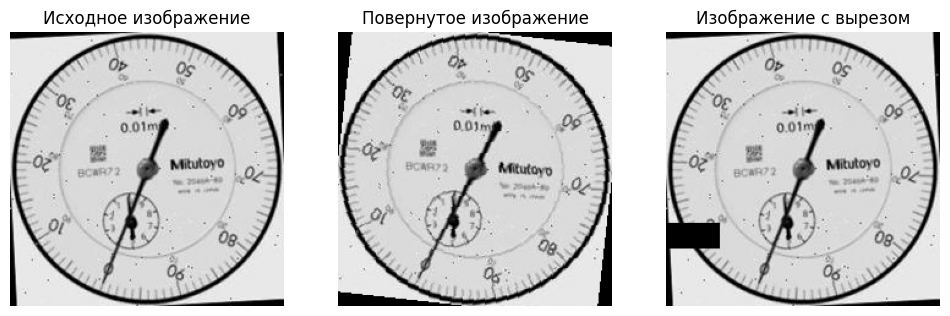

In [15]:
# Проверка отрисовки при параметре show_results=True
augment_image(image_path_1, show_results=True)

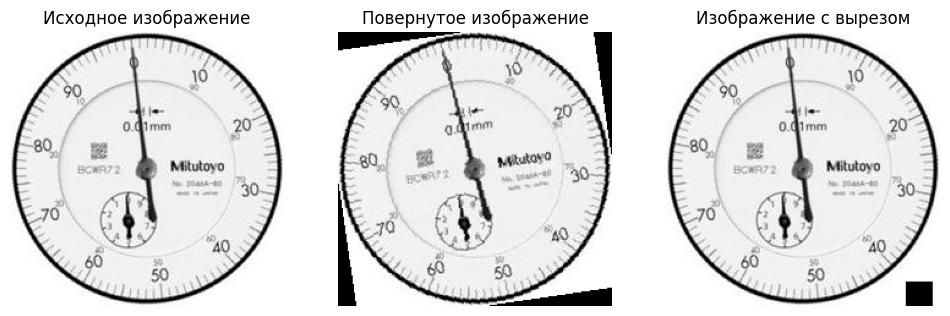

In [16]:
# Проверка отрисовки при параметре show_results=True
augment_image(image_path_3, show_results=True)

In [20]:
#Проверка функционала защиты от повторной аугментации
augment_image(image_path_3, show_results=False)

Предупреждение: Аугментации уже выполнены для этого изображения.


In [19]:
# Применение функции augment_image к одному изображению каждого класса.
def augment_dataset(input_dir, show_results=False):
    # Проходим по всем поддиректориям в указанной директории
    for root, dirs, files in os.walk(input_dir):
        # Фильтруем изображения
        images = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        
        # Если в папке есть изображения, выбираем одно
        if images:
            img_path = os.path.join(root, random.choice(images))  # Выбираем случайное изображение
            # Применяем аугментацию к изображению
            augment_image(img_path, show_results)

In [21]:
path = '/home/c13/main_venv/projects/preprocessed_images/train/'

In [22]:
augment_dataset(path, show_results=False)

In [23]:
def list_files_in_directory(directory):
    try:
        # Получаем список файлов и папок в указанной директории
        files = os.listdir(directory)
        
        # Фильтруем только файлы
        files = [file for file in files if os.path.isfile(os.path.join(directory, file))]
        
        # Выводим имена файлов
        for file in files:
            print(file)
    except FileNotFoundError:
        print(f"Директория '{directory}' не найдена.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

In [24]:
# Проверим что в директориях добавлены аугментированые файлы 
list_files_in_directory('/home/c13/main_venv/projects/preprocessed_images/train/0-01/')

gauge_rotated_7_jpg.rf.b2693e02f71f8ec84a0fcdb23338c0f7.jpg
gauge_rotated_3_jpg.rf.fa55b7021fdf6ca044128c43ef39f146.jpg
gauge_rotated_6_jpg.rf.ae2b31eb6c213ec6d681bb7dd699a902.jpg
gauge_rotated_4_jpg.rf.4886d854d3c1aa5dbb6ccc15c6b40e64_corrupted.jpg
gauge_rotated_5_jpg.rf.8baab1317b94db6b8f16def5568a7890.jpg
gauge_rotated_4_jpg.rf.21ca85e5ca577111957a9252f3331c4d.jpg
gauge_rotated_3_jpg.rf.11ea6b87e679e49d0beaf6ae21293e59.jpg
gauge_rotated_7_jpg.rf.1d32e84d56e8a0d412f7d1a8894d75ca.jpg
gauge_rotated_9_jpg.rf.bbabad53bf1cf9ee49edf0d85ff2ca2a.jpg
gauge_rotated_6_jpg.rf.7f195936c9ddb3730ab57d7ee96857cd.jpg
gauge_rotated_0_jpg.rf.96efaf52757eea6e7584c597905876fc.jpg
gauge_rotated_4_jpg.rf.4886d854d3c1aa5dbb6ccc15c6b40e64_tilted.jpg
gauge_rotated_7_jpg.rf.015fbd51484e1b8db6ad98a4f3bcafca.jpg
gauge_rotated_0_jpg.rf.7b3174a1109f7faced158064a4d3c90b.jpg
gauge_rotated_3_jpg.rf.73ae682931a6ecd6b99b6c2ac9214163.jpg
gauge_rotated_5_jpg.rf.1d77bd900e8334dd3d045cc7cd3e2e5c.jpg
gauge_rotated_9_jpg.rf.

## Задание 6 Формирование итогового датасета

### Посчитаем итоговое количесво файлов

In [25]:
def count_files_in_subdirectories(base_directory):
    total_files = 0

    # Проходим по всем поддиректориям в базовой директории
    for root, dirs, files in os.walk(base_directory):
        # Увеличиваем общее количество файлов на количество файлов в текущей директории
        total_files += len(files)

    return total_files

# Пример использования
base_directory = '/home/c13/main_venv/projects/preprocessed_images/train/'
total_file_count = count_files_in_subdirectories(base_directory)

# Выводим результат
print(f"Общее количество файлов в train: {total_file_count}")

Общее количество файлов в train: 23004


In [26]:
test_directory = '/home/c13/main_venv/projects/preprocessed_images/test/'
total_file_count = count_files_in_subdirectories(test_directory)
print(f"Общее количество файлов в test: {total_file_count}")

val_directory = '/home/c13/main_venv/projects/preprocessed_images/val/'
total_file_count = count_files_in_subdirectories(val_directory)
# Выводим результат
print(f"Общее количество файлов в val: {total_file_count}")

Общее количество файлов в test: 1000
Общее количество файлов в val: 2000


### Сохранение в файл preprocessed_images.zip

In [27]:
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            # Добавляем файл в ZIP-архив, сохраняя структуру директорий
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))

# Создаем ZIP-архив
with zipfile.ZipFile('preprocessed_images.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipdir('/home/c13/main_venv/projects/preprocessed_images/', zipf)

In [28]:
def display_project_structure():
    print('preprocessed_images')
    print('    |-- train')
    print('    |   |-- 0-00')
    print('    |   |-- 0-01')
    print('    |   |-- 0-02')
    print('    |   |-- ...')  # Здесь можно добавить больше папок
    print('    |-- test')
    print('    |   |-- 0-00')
    print('    |   |-- 0-01')
    print('    |   |-- 0-02')
    print('    |   |-- ...')  # Здесь можно добавить больше папок
    print('    |-- val')
    print('        |-- 0-00')
    print('        |-- 0-01')
    print('        |-- 0-02')
    print('        |-- ...')  # Здесь можно добавить больше папок

In [29]:
# Струкрута датасета
display_project_structure()

preprocessed_images
    |-- train
    |   |-- 0-00
    |   |-- 0-01
    |   |-- 0-02
    |   |-- ...
    |-- test
    |   |-- 0-00
    |   |-- 0-01
    |   |-- 0-02
    |   |-- ...
    |-- val
        |-- 0-00
        |-- 0-01
        |-- 0-02
        |-- ...


# Отчет

### В процессе выполнениея данного модуля выполнено:
###### C помощь Python кода выполнено извлечение из архива изобращения и сохранены в директорию images.
###### Реализована функция preprocessing_image предварительной обработки данных, приводит к размеру 224х224х3 и преобразовывает в серый.
###### Функция augment_image применена ко всем изображениям
###### Написана функция augment_image аугментации изображений, а именно повор изображения и вырезание случайной области. Сохранение файла с добавлением индекса файла. Возможность отрисовки аугментации. А так же проверкой что файлы уже были аугментированы.
###### Функция augment_image применена к одному изображению для каждого класса.
###### Продемонстрирован функционал отрисовки графиков с аугментациями.
###### Продемонстрирован функционал защиты от повторной аугментации.
###### Cформирован итоговый датасет, содержащий 23000 изображений для обучающей выборки, 1000 для тестовой и 2000 для валидационной. Cохранен в файл preprocessed_images.zip